In [1]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
# fastica, picard, infomax. Picard maybe better

In [114]:
df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt/EEGdata-2024-149--15-45-38.csv", sep=",")
end = df.shape[0]-5
fs = 250
df = df.iloc[:end, :8] # 3000 samples is 12 seconds of data
df

,FZ,C3,CZ,C4,PZ,PO7,OZ,PO8
0,243596.296875,251218.687500,259010.062500,251347.250000,221692.921875,242380.453125,239539.000000,225249.625000
1,243679.984375,251313.109375,259103.484375,251418.781250,221832.046875,242420.234375,239745.187500,225272.328125
2,243742.750000,251406.265625,259215.515625,251469.031250,222011.484375,242448.312500,240012.781250,225285.125000
3,243683.734375,251364.875000,259189.328125,251425.484375,221980.906250,242423.812500,239972.546875,225270.015625
4,243600.953125,251254.000000,259068.718750,251354.406250,221788.140625,242383.937500,239689.125000,225251.140625
...,...,...,...,...,...,...,...,...
71995,242800.578125,250025.375000,252553.171875,245610.187500,220302.468750,241147.625000,237832.046875,224287.781250
71996,242839.109375,250098.515625,252637.125000,245663.125000,220465.015625,241181.953125,238073.000000,224297.625000
71997,242836.781250,250131.406250,252692.390625,245675.187500,220579.000000,241191.609375,238241.437500,224298.515625
71998,242782.687500,250063.015625,252631.593750,245621.359375,220477.968750,241159.062500,238089.812500,224286.984375


In [118]:
# Constants
num_components = 8
allOutputs = df

channels = df.T

# create mne_info object
ch_names =        ['Fz', 
            'C3',  'Cz',  'C4', 
                   'Pz', 
            'PO7', 'Oz',  'PO8']

ch_type = ['eeg' for i in range(8)]
mne_info = mne.create_info(ch_names, float(250), ch_types=ch_type)

#create mne.raw object
raw = mne.io.RawArray(channels, mne_info)
raw.set_montage(mne.channels.make_standard_montage("standard_1005"))

Creating RawArray with float64 data, n_channels=8, n_times=72000
    Range : 0 ... 71999 =      0.000 ...   287.996 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,11 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [119]:
#actual code
raw.filter(0.5, 30)

ica = mne.preprocessing.ICA(n_components=num_components, random_state=0, max_iter=1000)
ica.fit(raw)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (6.604 s)

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


Fitting ICA took 0.5s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,16 iterations on raw data (72000 samples)
ICA components,8
Available PCA components,8
Channel types,eeg
ICA components marked for exclusion,—


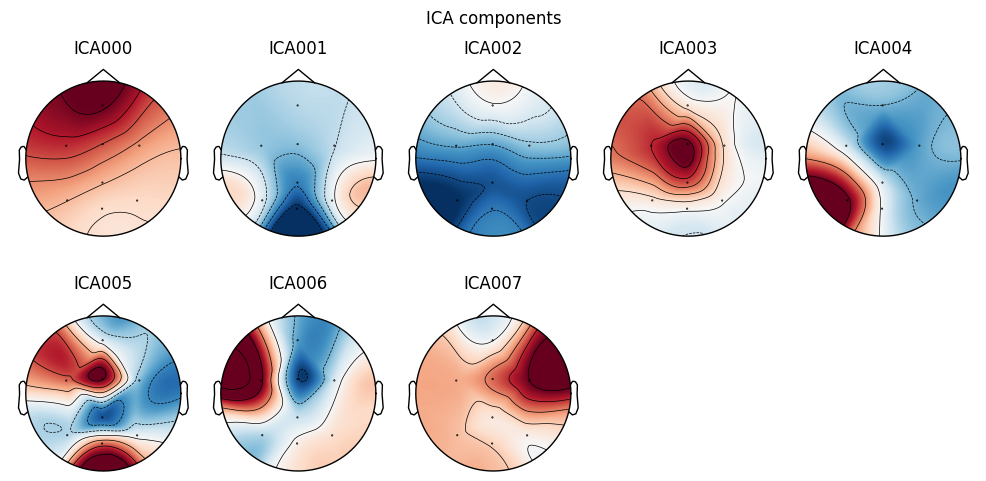

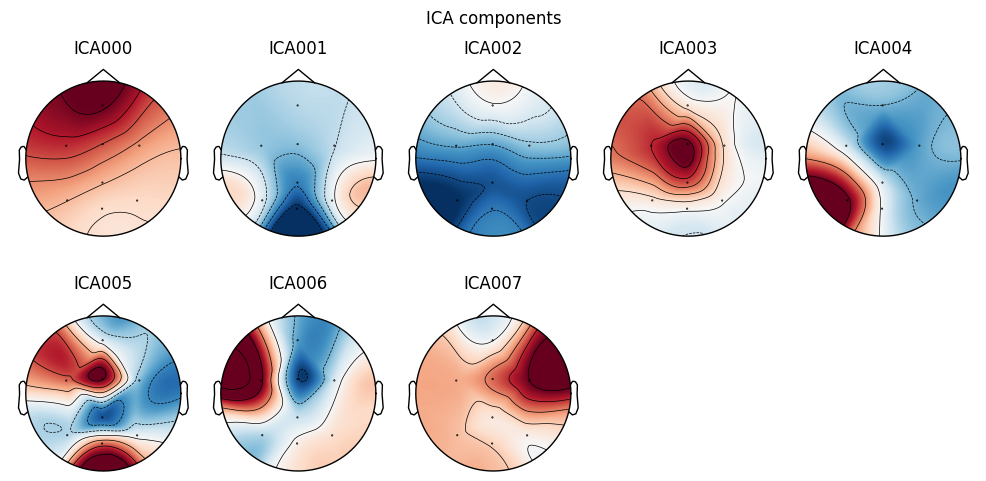

In [120]:
ica.plot_components(picks=range(num_components), ch_type='eeg')
